Code based on [this code](https://github.com/siyuanzhao/2016-EDM) used in paper "[Going Deeper with Deep Knowledge Tracing](http://www.educationaldatamining.org/EDM2016/proceedings/paper_133.pdf)" 

The ASSISTment Data is collected from a web-based automated math tutoring system. Core features include student id, question id & whether or not their answer was correct. 

There is [a dataset from 2009](https://sites.google.com/site/assistmentsdata/home/assistment-2009-2010-data/skill-builder-data-2009-2010) and is [a dataset from 2015](https://sites.google.com/site/assistmentsdata/home/2015-assistments-skill-builder-data)

The ASSISTDataProvider has a couple of modifications compared to the usual DataProvider.
 - You need to give it the path to the directory containing the .npz files
 - you can tell it which_year ('09' or '15')
 - For each batch, it produces inputs, targets AND target_ids.  
     - The target_ids contain indices for extracting a predictions vector from the output of the RNN (exactly like the 2016-EDM code).
 - There is no .npz file for the validation set. 
  - Instead, we use k-fold cross validation by first constructing a DataProvider using the training data, and then calling get_k_folds method, which returns k tuples of DataProviders: (train_dp, val_dp)

In [9]:
import numpy as np
from data_provider import ASSISTDataProvider
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# your path to directory containing data files
DATA_DIR = '/home/ben/mlp/mlp-group-project/data/assist09'

In [3]:
# batch_size is the number students included in each training batch
TrainingProvider = ASSISTDataProvider(DATA_DIR, batch_size=10, use_plus_minus_feats=True, use_compressed_sensing=False, 
                                     shuffle_order=False)

In [4]:
student = 2

In [4]:
# batch_size is the number students included in each training batch
TrainingProvider = ASSISTDataProvider(DATA_DIR, batch_size=10, use_plus_minus_feats=False, use_compressed_sensing=False, 
                                     shuffle_order=False)

train = TrainingProvider.inputs.toarray()

max_time_steps = TrainingProvider.max_num_ans
feature_len = TrainingProvider.encoding_dim
n_distict_questions = TrainingProvider.max_prob_set_id
print('time steps: {}, feat len: {}'.format(max_time_steps, feature_len))

train = train.reshape(-1, max_time_steps, feature_len)
train.shape

student_answer_counts = np.zeros(train.shape[0])
for j in range(train.shape[0]):
    for i in range(max_time_steps):
        argmax = np.argmax(np.abs(train[j, i]))
        if argmax==0:
            student_answer_counts[j] = i
            break
           
"""if argmax > n_distict_questions:
    print(argmax - n_distict_questions, train[j, i, argmax])
else:
    print(argmax, -int(train[j, i, argmax]))"""

time steps: 973, feat len: 293


'if argmax > n_distict_questions:\n    print(argmax - n_distict_questions, train[j, i, argmax])\nelse:\n    print(argmax, -int(train[j, i, argmax]))'

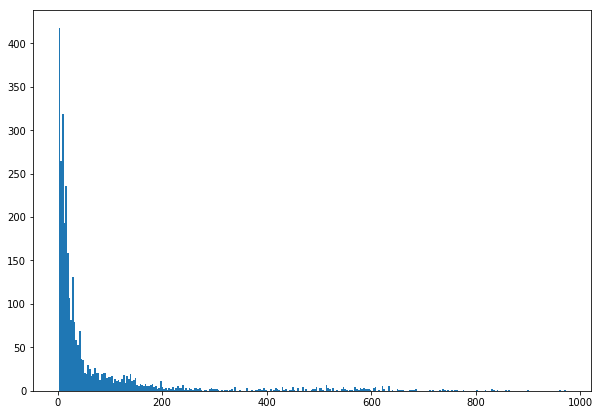

In [14]:
fig = plt.figure(figsize=(10, 7))
_ = plt.hist(student_answer_counts, bins=300)

In [17]:
100* np.sum(student_answer_counts > 500) / student_answer_counts.size

3.5115979381443299

In [6]:
# batch_size is the number students included in each training batch
TrainingProvider = ASSISTDataProvider(DATA_DIR, batch_size=10, use_plus_minus_feats=True, use_compressed_sensing=False, 
                                     shuffle_order=False)

train = TrainingProvider.inputs.toarray()

max_time_steps = TrainingProvider.max_num_ans
feature_len = TrainingProvider.encoding_dim
print('time steps: {}, feat len: {}'.format(max_time_steps, feature_len))

train = train.reshape(-1, max_time_steps, feature_len)
train.shape

for i in range(max_time_steps):
    argmax = np.argmax(np.abs(train[student, i]))
    if argmax==0:
        print('answered {} questions'.format(i))
        break
    print(argmax, train[student, i, argmax])
    
train[student, 28]

time steps: 973, feat len: 147
104 -1
102 1
138 -1
104 1
138 1
104 -1
27 1
28 -1
28 -1
28 -1
28 1
28 -1
3 1
120 1
120 1
120 1
120 1
120 1
130 1
133 1
133 1
133 1
133 -1
133 1
133 1
133 1
133 -1
133 1
133 1
answered 29 questions


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
# batch_size is the number students included in each training batch
TrainingProvider = ASSISTDataProvider(DATA_DIR, which_set='train', batch_size=10, use_plus_minus_feats=False, use_compressed_sensing=True, 
                                     shuffle_order=False)

train = TrainingProvider.inputs.toarray()

max_time_steps = TrainingProvider.max_num_ans
feature_len = TrainingProvider.encoding_dim
print('time steps: {}, feat len: {}'.format(max_time_steps, feature_len))

train = train.reshape(-1, max_time_steps, feature_len)
train.shape

for i in range(max_time_steps):
    argmax = np.argmax(np.abs(train[student, i]))
    if argmax==0:
        print('answered {} questions'.format(i))
        break
    print(argmax, train[student, i, argmax])

time steps: 973, feat len: 100
99 2.57306406282
66 -2.78007257718
80 1.97280070664
22 2.84318295174
93 2.49173785056
99 2.57306406282
51 -2.86604934833
15 -4.18810237931
15 -4.18810237931
15 -4.18810237931
49 -2.78600587859
15 -4.18810237931
18 2.75653670855
25 -2.68611063405
25 -2.68611063405
25 -2.68611063405
25 -2.68611063405
25 -2.68611063405
89 -2.85447816076
63 -3.00661492065
63 -3.00661492065
63 -3.00661492065
57 3.14860699624
63 -3.00661492065
63 -3.00661492065
63 -3.00661492065
57 3.14860699624
63 -3.00661492065
63 -3.00661492065
answered 29 questions


In [8]:
# iterate through the batches
for inputs, targets, target_ids in TrainingProvider:    
    # inputs has shape (batch_size, num_students, length_of_feature_vector)
    print(inputs.shape)
    
    # each student has a sequence of answer correctness labels
    # for the problems they answered, with 0=correct, 1=incorrect.
    # Targets is a flattened array containing all these scores, so
    # is length \sum_i num_questions_answered_by_student_i
    print(len(targets))
    
    # ids of the questions answered (need to extract a predictions
    # after training), should be same shape as targets
    print(len(target_ids))
    break

(10, 973, 100)
398
1420580


In [9]:
# example of how to use cross-validiation
i = 1
for data_provider_train, data_provider_val in TrainingProvider.get_k_folds(5):
    print('FOLD {}'.format(i))
    print('train data provider has {} students'.format(data_provider_train.inputs.shape[0]))
    print('val data provider has {} students'.format(data_provider_val.inputs.shape[0]))
    print('----------------')
    i += 1

FOLD 1
train data provider has 2483 students
val data provider has 621 students
----------------
FOLD 2
train data provider has 2483 students
val data provider has 621 students
----------------
FOLD 3
train data provider has 2483 students
val data provider has 621 students
----------------
FOLD 4
train data provider has 2483 students
val data provider has 621 students
----------------
FOLD 5
train data provider has 2484 students
val data provider has 620 students
----------------


### Notes on how data is represented:

In [10]:
# entire dataset `.inputs` is stored as a spare matrix 
train_set = TrainingProvider.inputs.todense()

# sparse matrix must be 2D, so has shape 
# (num_students, (2*max_question_id)+1 * max_number_of_questions_answered)
print(train_set.shape)

(3104, 97300)


- Each row of data is a student 
    - So, matrix has first dimension = num_students
- Each each column is an "answer label" (incorrect/correct) to a question, and the number of columns is the maximum number of questions any student answered 
    - So, matrix has second dimension = max_number_of_questions_answered 
    - Example: Student_A answered more questions than anyone else, answering 100 questions. The matrix has 100 columns, and Student_B who answered only 90 questions, has zeros in the last 10 columns.
- However, each "answer label" is encoded as a one-hot vector in the following way:
    - there are max_question_id number of questions, e.g. 15 different questions
    - let the vector 'is_incorrrect' be a one-hot vector with 1 in the i^th position is a student got question with id number i incorrect
    - let the vector 'is_corrrect' be a one-hot vector with 1 in the i^th position is a student got question with id number i correct
    - each "answer label" is the represented by the vector [is_incorrrect, is_correct], which has length 2*max_question_id
    - this vector is left-padded with a zero (I don't know why...)
    - So, each "answer label" is a one-hot vecotr of length (2 $\times$ max_question_id)+1
    - So, matrix has second dimension = 
    (2 $\times$ max_question_id)+1 $\times$ 
    max_number_of_questions_answered)

In [11]:
import numpy as np
A = np.random.randn(5,2)

In [12]:
np.dot(np.arange(25).reshape(5,5), A)

array([[   8.70398188,   -6.54481812],
       [  32.55613273,  -14.95586609],
       [  56.40828358,  -23.36691406],
       [  80.26043444,  -31.77796202],
       [ 104.11258529,  -40.18900999]])